In [256]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [257]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [216]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [217]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [218]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [258]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [220]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [221]:
lm.coef_, lm.intercept_  

(array([ -17.64767325, -168.35516639,  548.89767825,  257.20792965,
        -884.29288585,  529.033453  ,  220.90508961,  303.29769372,
         777.65608248,   76.72101995]),
 151.62454671011298)

In [222]:
predictions[0:5]

array([236.20841947, 151.1668181 ,  52.827188  , 116.29110299,
        72.5547284 ])

Text(0, 0.5, 'Predictions')

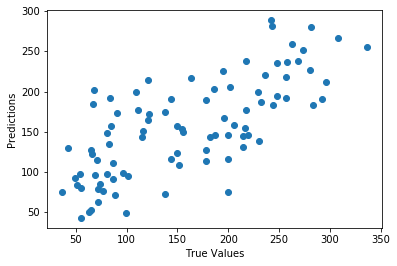

In [223]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [224]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 54.47788080596832
Train RMSE: 53.5176621921993


# Cross Validation

In [225]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [226]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [227]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [228]:
X_train

array([[1, 2],
       [3, 4]])

In [229]:
X_test

array([[1, 2],
       [3, 4]])

### LOOCV

In [230]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [231]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [232]:
?cross_val_score

In [235]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


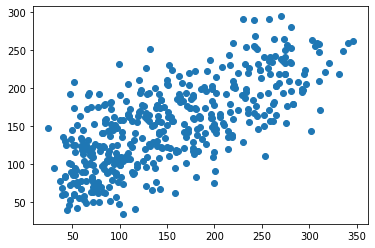

In [236]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [237]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528679

# tasks 

##### Find out cross validation results without using cross_val_predict

Train RMSE: 53.30217034753155
Test RMSE: 55.08386582991752
Train RMSE: 52.089723515415436
Test RMSE: 57.03703680216377
Train RMSE: 54.13665796249799
Test RMSE: 52.858090378672095
Mean Train RMSE: 53.176183941815
Mean Test RMSE: 54.99299767025113


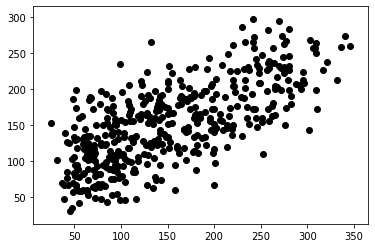

In [251]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
sum1=0
sum2=0
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lm = linear_model.LinearRegression()
    model =lm.fit(X_train, y_train)
    predict =lm.predict(X_test)
    
    print('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))
    print('Test RMSE:', np.sqrt(mean_squared_error(y_test,predict)))
    plt.scatter(y_test,predict, color = 'black')
    sum1+=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
    sum2+=np.sqrt(mean_squared_error(y_test,predict))

print('Mean Train RMSE:', sum1/3)
print('Mean Test RMSE:', sum2/3)

##### Implement cross validation without using sklearn at all

Train RMSE: 53.30217034753155
Test RMSE: 55.08386582991752
Train RMSE: 52.089723515415436
Test RMSE: 57.03703680216377
Train RMSE: 54.13665796249799
Test RMSE: 52.858090378672095
Mean Train RMSE: 53.176183941815
Mean Test RMSE: 54.99299767025113


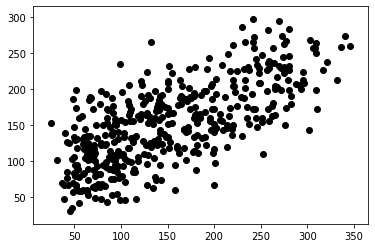

In [259]:
k = 3
folds = np.array_split(df, k)
sum3=0
sum4=0
for i in range(k):
    train = folds.copy()
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort = False)


    X_train, X_test = df.iloc[train.index], df.iloc[test.index]
    y_train, y_test = y[train.index], y[test.index]
    
    lm = linear_model.LinearRegression()
    model =lm.fit(X_train, y_train)
    predict =lm.predict(X_test)
    
    print('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))
    print('Test RMSE:', np.sqrt(mean_squared_error(y_test,predict)))
    plt.scatter(y_test,predict, color = 'black')
    sum3+=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
    sum4+=np.sqrt(mean_squared_error(y_test,predict))

print('Mean Train RMSE:', sum3/3)
print('Mean Test RMSE:', sum4/3)

# Feature Scaling

In [76]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,CM,22.0,2019,5'9,134lbs
17903,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,ST,21.0,2020,6'3,170lbs
17904,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,ST,33.0,2021,5'8,148lbs
17905,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,RW,34.0,2019,5'10,154lbs


In [77]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)
data

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [78]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [79]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.206897,0.541667,0.659574,0.122449
1,0.448276,0.354167,0.319149,0.265306
2,0.206897,0.312500,0.489362,0.255102
3,0.206897,0.583333,0.723404,0.000000
4,0.482759,0.458333,0.425532,0.071429
...,...,...,...,...
14320,0.310345,0.416667,0.446809,0.061224
14321,0.068966,0.187500,0.510638,0.163265
14322,0.034483,0.104167,0.553191,0.112245
14323,0.137931,0.291667,0.446809,0.183673


In [80]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.413793,0.520833,0.489362,0.091837
1,0.172414,0.270833,0.425532,0.255102
2,0.310345,0.291667,0.361702,0.051020
3,0.275862,0.312500,0.425532,0.244898
4,0.448276,0.520833,0.489362,0.102041
...,...,...,...,...
3577,0.068966,0.229167,0.510638,0.204082
3578,0.344828,0.583333,0.574468,0.010204
3579,0.172414,0.354167,0.446809,0.285714
3580,0.275862,0.416667,0.425532,0.061224


### Standard Scaler

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [149]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.877500,-1.472485,-0.704010,1.261695
1,0.196691,1.265282,0.759980,0.146003
2,-0.018147,0.112538,-0.216013,0.889797
3,-0.877500,-0.031555,0.434649,0.084020
4,-0.877500,-2.048857,-1.354672,0.889797
...,...,...,...,...
14320,1.056045,0.256631,-0.541344,-0.721758
14321,-0.018147,2.129840,2.223971,-0.225895
14322,-1.736854,0.256631,2.549302,-0.163912
14323,2.559913,-0.752020,-1.680003,0.207986


In [150]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.411530,-0.607927,-1.517338,-0.969689
1,0.411530,1.265282,0.597315,-0.597792
2,1.700560,0.833003,0.109318,-0.969689
3,-0.018147,-1.040206,-1.517338,-0.659775
4,0.626368,0.256631,-0.541344,-0.287878
...,...,...,...,...
3577,-0.018147,0.544817,0.271984,-0.783741
3578,-0.447824,0.688910,1.247977,0.207986
3579,0.196691,0.112538,-0.704010,-0.163912
3580,0.196691,-0.607927,-1.029341,-0.907706


# tasks

###### try applying this scalers to any dataset and check the regression results

MinMaxScaler

In [154]:
df = pd.read_csv('Advertising.csv', index_col = 'ID') 
df

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

columns1 = df.columns

norm = MinMaxScaler().fit(df)
df =pd.DataFrame(columns = columns1, data=norm.transform(df))
y=df['Sales']
print(y)
df=df[df.columns.difference(['Sales'])]
df

0      0.807087
1      0.346457
2      0.303150
3      0.665354
4      0.444882
         ...   
195    0.236220
196    0.318898
197    0.440945
198    0.940945
199    0.464567
Name: Sales, Length: 200, dtype: float64


,Newspaper,Radio,TV
0,0.605981,0.762097,0.775786
1,0.394019,0.792339,0.148123
2,0.606860,0.925403,0.055800
3,0.511873,0.832661,0.509976
4,0.510994,0.217742,0.609063
...,...,...,...
195,0.118734,0.074597,0.126818
196,0.068602,0.098790,0.316199
197,0.053650,0.187500,0.596212
198,0.579595,0.846774,0.956713


In [157]:
X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.2, random_state=7)

In [158]:
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [159]:
print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 0.05
Mean squared error: 0.00
Root mean squared error: 0.06
R-squared: 0.91


Standard Scaler

In [164]:
df = pd.read_csv('Advertising.csv', index_col = 'ID') 

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

columns1 = df.columns

norm = StandardScaler().fit(df)
df =pd.DataFrame(columns = columns1, data=norm.transform(df))
y=df['Sales']
print(y)
df=df[df.columns.difference(['Sales'])]

0      1.552053
1     -0.696046
2     -0.907406
3      0.860330
4     -0.215683
         ...   
195   -1.234053
196   -0.830548
197   -0.234898
198    2.205347
199   -0.119610
Name: Sales, Length: 200, dtype: float64


In [166]:
X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.2, random_state=7)

In [167]:
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [168]:
print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 0.22
Mean squared error: 0.09
Root mean squared error: 0.30
R-squared: 0.91


Just linear regression

In [160]:
df = pd.read_csv('Advertising.csv') 
df=df.drop(['ID'], axis = 1)
y=df['Sales']
df=df[df.columns.difference(['Sales'])]
df

,Newspaper,Radio,TV
0,69.2,37.8,230.1
1,45.1,39.3,44.5
2,69.3,45.9,17.2
3,58.5,41.3,151.5
4,58.4,10.8,180.8
...,...,...,...
195,13.8,3.7,38.2
196,8.1,4.9,94.2
197,6.4,9.3,177.0
198,66.2,42.0,283.6


In [161]:
X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.2, random_state=7)
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)


In [162]:
print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 1.14
Mean squared error: 2.43
Root mean squared error: 1.56
R-squared: 0.91


# One Hot Encoding

In [201]:
data = pd.read_csv('regression.csv')
data=data.drop(['Name', 'Nationality', 'Jersey Number', 'Contract Valid Until', 'Height', 'Weight'], axis = 1)
data

,Age,Overall,Potential,Club,Value,Wage,Position
0,31,94,94,FC Barcelona,110500000.0,€565K,RF
1,33,94,94,Juventus,77000000.0,€405K,ST
2,26,92,93,Paris Saint-Germain,118500000.0,€290K,LW
3,27,91,93,Manchester United,72000000.0,€260K,GK
4,27,91,92,Manchester City,102000000.0,€355K,RCM
...,...,...,...,...,...,...,...
17902,19,47,65,Crewe Alexandra,60000.0,€1K,CM
17903,19,47,63,Trelleborgs FF,60000.0,€1K,ST
17904,16,47,67,Cambridge United,60000.0,€1K,ST
17905,17,47,66,Tranmere Rovers,60000.0,€1K,RW


In [202]:
data= pd.get_dummies(data[['Age','Overall','Potential', 'Club', 'Value', 'Wage', 'Position']])
data

,Age,Overall,Potential,Value,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,94,94,110500000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,33,94,94,77000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,118500000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,91,93,72000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,91,92,102000000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,47,65,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,47,63,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,16,47,67,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,17,47,66,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [203]:
columns1 = data.columns

norm = MinMaxScaler().fit(data)
data =pd.DataFrame(columns = columns1, data=norm.transform(data))
y=data['Value']
print(y)
data=data[data.columns.difference(['Value'])]
data

0        0.932484
1        0.649759
2        1.000000
3        0.607562
4        0.860748
           ...   
17902    0.000422
17903    0.000422
17904    0.000422
17905    0.000422
17906    0.000422
Name: Value, Length: 17907, dtype: float64


,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Wage_€91K,Wage_€92K,Wage_€93K,Wage_€94K,Wage_€95K,Wage_€96K,Wage_€97K,Wage_€98K,Wage_€99K,Wage_€9K
0,0.517241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.586207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,0.103448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17903,0.103448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17904,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17905,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
X_train,X_test,y_train,y_test=train_test_split(data,y, test_size=0.1)

In [208]:
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [209]:
print('Mean absolute error: %.2f'
     % mean_absolute_error(y_test, y_predict))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_predict)))

print('R-squared: %.2f'
      % r2_score(y_test, y_predict))

Mean absolute error: 0.01
Mean squared error: 0.00
Root mean squared error: 0.02
R-squared: 0.80
